<a href="https://www.kaggle.com/code/biocanter/top70-with-10-numerical-features-elasticnet?scriptVersionId=99679380" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
####impport data
train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
test1 = "../input/house-prices-advanced-regression-techniques/test.csv"
test = pd.read_csv(test1, index_col='Id')

In [3]:
###check train the data
####train misssing data
a=train.isna().sum()
b=train.columns
for h in range(0, len(a)):
    if a[h]>0:
        print (b[h]+":"+str(a[h])) 

LotFrontage:259
Alley:1369
MasVnrType:8
MasVnrArea:8
BsmtQual:37
BsmtCond:37
BsmtExposure:38
BsmtFinType1:37
BsmtFinType2:38
Electrical:1
FireplaceQu:690
GarageType:81
GarageYrBlt:81
GarageFinish:81
GarageQual:81
GarageCond:81
PoolQC:1453
Fence:1179
MiscFeature:1406


In [4]:
###if we check the categorical data we can realize some categorical data are actually numerical data
qual_dict = {"na": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
train['ExterQual']=train['ExterQual'].fillna("na")
train['ExterCond']=train['ExterCond'].fillna("na")
train['BsmtCond']=train['BsmtCond'].fillna("na")
train['BsmtQual']=train['BsmtQual'].fillna("na")
train['KitchenQual']=train['KitchenQual'].fillna("na")
train['GarageQual']=train['GarageQual'].fillna("na")
train['GarageCond']=train['GarageCond'].fillna("na")
####
train["ExterQual"] = train["ExterQual"].map(qual_dict)
train["ExterCond"] = train["ExterCond"].map(qual_dict)
train["BsmtCond"] = train["BsmtCond"].map(qual_dict)
train["BsmtQual"] = train["BsmtQual"].map(qual_dict)
train["KitchenQual"] = train["KitchenQual"].map(qual_dict)
train["GarageQual"] = train["GarageQual"].map(qual_dict)
train["GarageCond"] = train["GarageCond"].map(qual_dict)

In [5]:
a=train.isna().sum()
b=train.columns
for h in range(0, len(a)):
    if a[h]>0:
        print (b[h]+":"+str(a[h])) 

LotFrontage:259
Alley:1369
MasVnrType:8
MasVnrArea:8
BsmtExposure:38
BsmtFinType1:37
BsmtFinType2:38
Electrical:1
FireplaceQu:690
GarageType:81
GarageYrBlt:81
GarageFinish:81
PoolQC:1453
Fence:1179
MiscFeature:1406


In [6]:
####numerical feature
numericvar=train.select_dtypes(include=['int64', 'float64']).columns.tolist()
missing=[]
print (numericvar)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


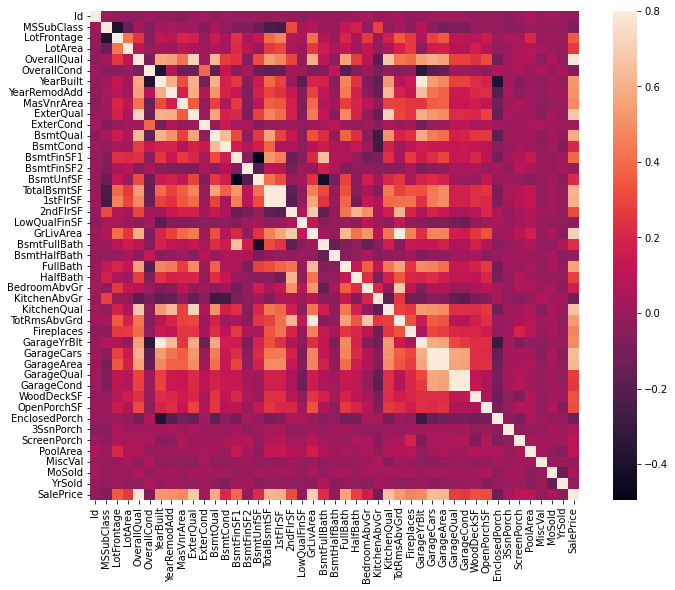

Find most important features relative to target
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
ExterQual        0.682639
KitchenQual      0.659600
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
BsmtQual         0.585207
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
GarageQual       0.273839
LotArea          0.263843
GarageCond       0.263191
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BsmtCond         0.212607
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
ExterCond        0.018899
BsmtFinSF2      -0.011378
BsmtHalfBath    

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
###numerical data correlation with SalePrice
corrmat_price = train[numericvar].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat_price , vmax=.8, square=True);
plt.show()
print("Find most important features relative to target")
corrmat_price.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corrmat_price.SalePrice)

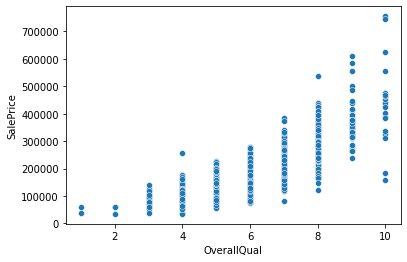

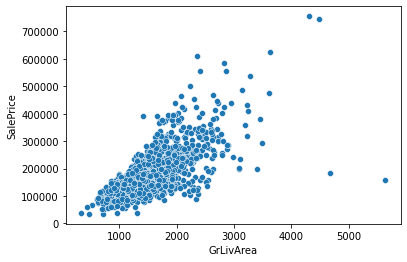

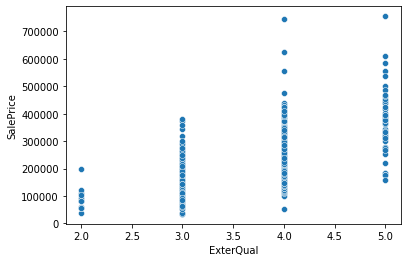

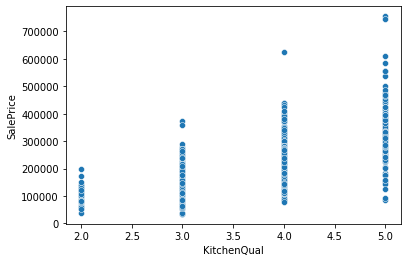

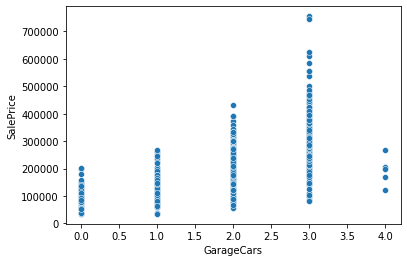

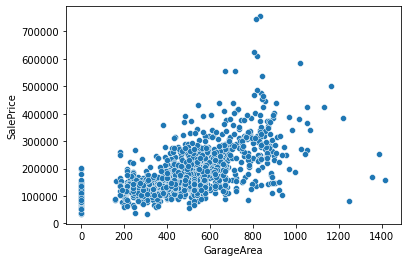

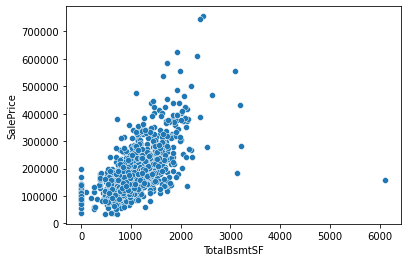

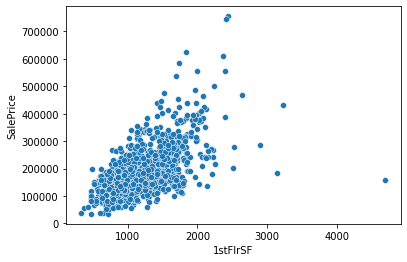

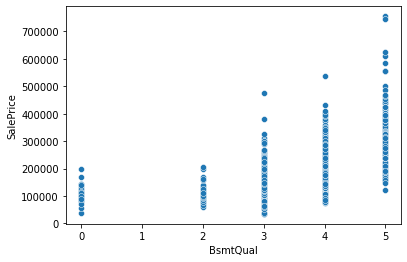

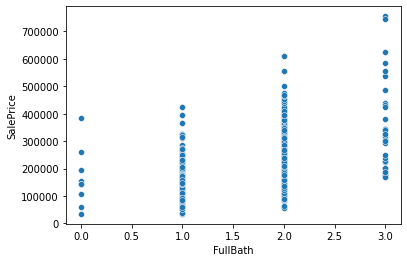

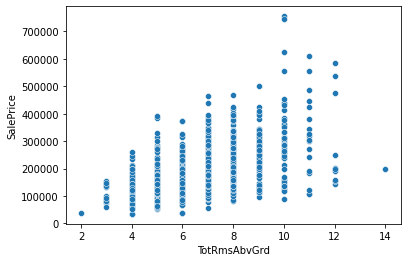

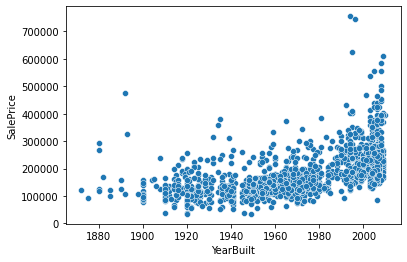

In [8]:
###check top 10 numerical feature
topcorrel=corrmat_price.SalePrice[1:13]
topcorrel=topcorrel.index
topcorrel_10=topcorrel
for topcorrel in topcorrel:
    sns.scatterplot(x = topcorrel, y = 'SalePrice' , data = train)
    plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


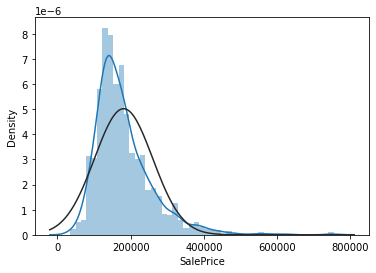

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


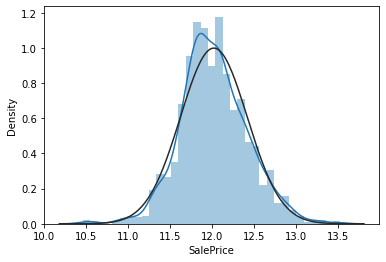

In [9]:
###Feature Engineering
##Log-transformation of skewed target variable
from scipy.stats import norm, skew 
from scipy import stats
from scipy.special import boxcox1p
sns.distplot(train['SalePrice'], fit=norm);
plt.show()
train['SalePrice'] = np.log1p(train['SalePrice'])
##now we can see our target variable with a normal distribution.
sns.distplot(train['SalePrice'], fit=norm);
plt.show()

In [10]:
###Feature optimization & Engineering 
###removing outliers
train = train[train.GrLivArea < 4000]

# Find skewed numerical features
skew_features = train[topcorrel_10].apply(lambda x: skew(x)).sort_values(ascending=False)
print (skew_features)
for h in range (0, len(skew_features)):
    skew_features[h]=abs(skew_features[h])
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

train[skew_index] = boxcox1p(train[skew_index], 0.15)

skew_features = train[topcorrel_10].apply(lambda x: skew(x)).sort_values(ascending=False)
for h in range (0, len(skew_features)):
    skew_features[h]=abs(skew_features[h])
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index
print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
print (high_skew)

1stFlrSF        0.866187
GrLivArea       0.834332
ExterQual       0.818115
TotRmsAbvGrd    0.660735
TotalBsmtSF     0.485894
KitchenQual     0.381040
OverallQual     0.183681
GarageArea      0.132854
FullBath        0.017675
GarageCars     -0.343121
YearBuilt      -0.609458
BsmtQual       -1.300341
dtype: float64
There are 3 numerical features with Skew > 0.5 :
ExterQual    0.595253
YearBuilt    0.632947
BsmtQual     3.251172
dtype: float64


In [11]:
####use robustscaler beacuse of the outliers
from sklearn.preprocessing import RobustScaler
trans = RobustScaler()
train[topcorrel_10] = trans.fit_transform(train[topcorrel_10])

Training score: 0.8506094407237687
Test score: 0.8704096672380416
MSE: 0.0195871855516844


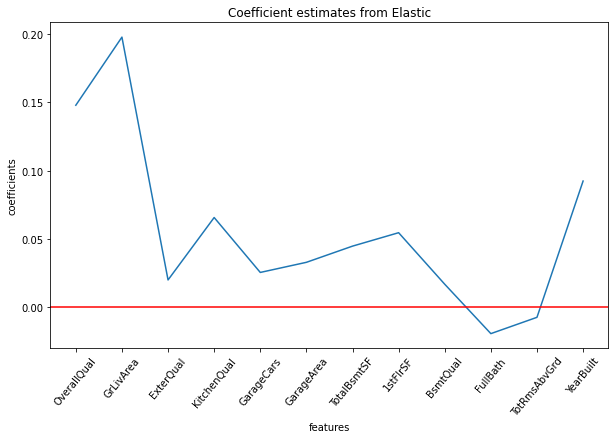

In [12]:
###use this top 10 correlatin feature to build a model
##split into train and test data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
import math
X=train[topcorrel_10]
y=train['SalePrice']
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)
###elastic model


elasticnet = ElasticNet(alpha=0.001, l1_ratio=0.31)

elasticnet.fit(train_X, train_y)

print('Training score: {}'.format(elasticnet.score(train_X, train_y)))
print('Test score: {}'.format(elasticnet.score(val_X, val_y)))

y_pred = elasticnet.predict(val_X)
mse = mean_squared_error(val_y, y_pred)
rmse = math.sqrt(mse)
print('MSE: {}'.format(mse))
###########
feature_names=X.columns
# Creating an object containing the best Lasso regression model
best_elastic_model= ElasticNet(alpha=0.001, l1_ratio=0.31)
# Extracting the coefficient estimates for all ten features
best_elastic_coeffs = best_elastic_model.fit(train_X, train_y).coef_
# plotting the coefficient estimates for all ten features
plt.figure(figsize=(10,6))
plt.plot(range(len(feature_names)),best_elastic_coeffs)
plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_names)),feature_names,rotation=50)
plt.title("Coefficient estimates from Elastic")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

In [13]:
###model optimization
# use automatically configured elastic net algorithm
from sklearn.linear_model import ElasticNetCV
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import RepeatedKFold
###
import warnings
warnings.filterwarnings("ignore")
# load the dataset
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
ratios = arange(0, 1, 0.01)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
model = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1)
# fit model
model.fit(X, y)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)
print('l1_ratio_: %f' % model.l1_ratio_)

alpha: 0.001000
l1_ratio_: 0.000000


Training score: 0.8506424026402181
Test score: 0.870409602542219
MSE: 0.01958719533026167


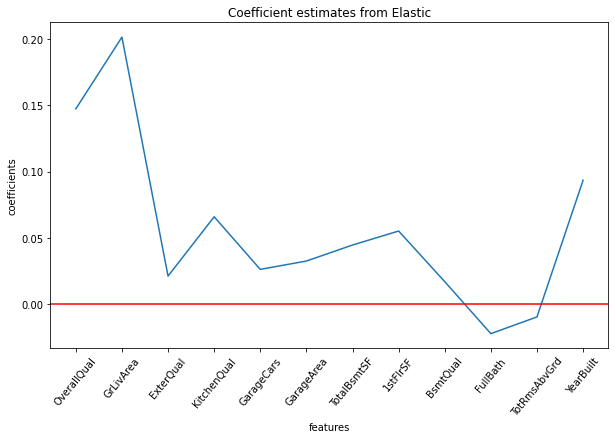

In [14]:
####use last configuration 
#alpha: 0.010000
#l1_ratio_: 0.000000
elasticnet = ElasticNet(alpha=0.001, l1_ratio=0)
elasticnet.fit(train_X, train_y)
print('Training score: {}'.format(elasticnet.score(train_X, train_y)))
print('Test score: {}'.format(elasticnet.score(val_X, val_y)))
y_pred = elasticnet.predict(val_X)
mse = mean_squared_error(val_y, y_pred)
rmse = math.sqrt(mse)
print('MSE: {}'.format(mse))
#######
feature_names=X.columns
# Creating an object containing the best Lasso regression model
best_elastic_model= ElasticNet(alpha=0.001, l1_ratio=0)
# Extracting the coefficient estimates for all ten features
best_elastic_coeffs = best_elastic_model.fit(train_X, train_y).coef_
# plotting the coefficient estimates for all ten features
plt.figure(figsize=(10,6))
plt.plot(range(len(feature_names)),best_elastic_coeffs)
plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_names)),feature_names,rotation=50)
plt.title("Coefficient estimates from Elastic")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

In [15]:
###check the data
####misssing data
a=test.isna().sum()
b=test.columns
for h in range(0, len(a)):
    if a[h]>0:
        print (b[h]+":"+str(a[h]))

MSZoning:4
LotFrontage:227
Alley:1352
Utilities:2
Exterior1st:1
Exterior2nd:1
MasVnrType:16
MasVnrArea:15
BsmtQual:44
BsmtCond:45
BsmtExposure:44
BsmtFinType1:42
BsmtFinSF1:1
BsmtFinType2:42
BsmtFinSF2:1
BsmtUnfSF:1
TotalBsmtSF:1
BsmtFullBath:2
BsmtHalfBath:2
KitchenQual:1
Functional:2
FireplaceQu:730
GarageType:76
GarageYrBlt:78
GarageFinish:78
GarageCars:1
GarageArea:1
GarageQual:78
GarageCond:78
PoolQC:1456
Fence:1169
MiscFeature:1408
SaleType:1


In [16]:
####input test missing value
test['TotalBsmtSF']=test['TotalBsmtSF'].fillna(0)
test['GarageCars']=test['GarageCars'].fillna(0)
test['GarageArea']=test['GarageArea'].fillna(0)
###transform categorical data into numerical data
test['ExterQual']=test['ExterQual'].fillna("na")
test['ExterCond']=test['ExterCond'].fillna("na")
test['BsmtCond']=test['BsmtCond'].fillna("na")
test['BsmtQual']=test['BsmtQual'].fillna("na")
test['KitchenQual']=test['KitchenQual'].fillna("na")
test['GarageQual']=test['GarageQual'].fillna("na")
test['GarageCond']=test['GarageCond'].fillna("na")
####
test["ExterQual"] = test["ExterQual"].map(qual_dict)
test["ExterCond"] = test["ExterCond"].map(qual_dict)
test["BsmtCond"] = test["BsmtCond"].map(qual_dict)
test["BsmtQual"] = test["BsmtQual"].map(qual_dict)
test["KitchenQual"] = test["KitchenQual"].map(qual_dict)
test["GarageQual"] = test["GarageQual"].map(qual_dict)
test["GarageCond"] = test["GarageCond"].map(qual_dict)
###Feature optimization & Engineering 

# Find skewed numerical features
skew_features = test[topcorrel_10].apply(lambda x: skew(x)).sort_values(ascending=False)
print (skew_features)
for h in range (0, len(skew_features)):
    skew_features[h]=abs(skew_features[h])
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

test[skew_index] = boxcox1p(test[skew_index], 0.15)

skew_features = test[topcorrel_10].apply(lambda x: skew(x)).sort_values(ascending=False)
for h in range (0, len(skew_features)):
    skew_features[h]=abs(skew_features[h])
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index
print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
print (high_skew)
####robust scaler
test[topcorrel_10] = trans.fit_transform(test[topcorrel_10])  

1stFlrSF        1.556592
GrLivArea       1.129240
TotRmsAbvGrd    0.841731
TotalBsmtSF     0.804238
ExterQual       0.749542
KitchenQual     0.387356
GarageArea      0.295986
FullBath        0.295534
OverallQual     0.181010
GarageCars     -0.109880
YearBuilt      -0.587052
BsmtQual       -1.246595
dtype: float64
There are 3 numerical features with Skew > 0.5 :
YearBuilt      0.608439
BsmtQual       3.023208
TotalBsmtSF    3.826094
dtype: float64


In [17]:
####fit the model with all train data and predict price with test data
elasticnet.fit(X, y)
final_test=test[topcorrel_10]
test_pred = elasticnet.predict(final_test)
###inverse of log1p
test_pred=np.expm1(test_pred)

In [18]:
output = pd.DataFrame({'Id': test.index,
                       'SalePrice': test_pred})
output.to_csv('submission.csv', index=False)
output
#test_pred

,Id,SalePrice
0,1461,119001.803824
1,1462,164493.024939
2,1463,164850.591381
3,1464,183351.882427
4,1465,213250.511740
...,...,...
1454,2915,98402.442226
1455,2916,104704.572591
1456,2917,144778.260886
1457,2918,118298.295771
